In [1]:
import os
os.chdir('../')

In [2]:
import numpy as np
import argparse
import time
from itertools import chain
import matplotlib.pyplot as plt
import multiprocessing as mp

import torch
import torch.nn as nn
from torch.utils.tensorboard import SummaryWriter

from datasets import inputs
from sr_model.models.models import AnalyticSR, STDP_SR

/home/chingf/Code/sr-project/datasets/inputs.py:12: UserWarning: Emily's experimental data could not be loaded.
  warnings.warn("Emily's experimental data could not be loaded.")


In [3]:
save_path = './trained_models/01_loss_curves/'
model_files = os.listdir(save_path)

device = 'cpu'

kernels = []

net = STDP_SR(num_states=16, gamma=0.4)
for model_file in model_files:
    model_path = save_path + model_file + '/model.pt'
    net.load_state_dict(torch.load(model_path))
    kernels.append(net.ca3.get_stdp_kernel(kernel_len=7))

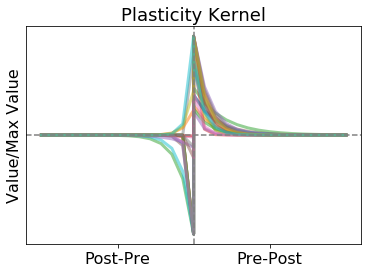

In [26]:
plt.figure()
for (xs, ys) in kernels[:20]:
    plt.plot(xs, ys/np.max(np.abs(ys)), alpha=0.5, linewidth=3)
plt.xticks([])
plt.axvline(0, linestyle='--', color="gray")
plt.axhline(0, linestyle='--', color="gray")
plt.title("Plasticity Kernel", fontsize=18)
plt.ylabel("Value/Max Value", fontsize=16)
plt.xticks([-3.5, 3.5], ['Post-Pre', 'Pre-Post'], fontsize=16)
plt.yticks([])
plt.ylim(-1.1, 1.1)
plt.savefig('kernels.png', dpi=300)
plt.savefig('kernels.pdf', dpi=300)
plt.show()